In [4]:
## importing libraries 

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "ticks")
import warnings
warnings.filterwarnings('ignore')

In [5]:
## reading dataset

server_df = pd.read_csv('tips.csv')

## setting max columns to none
pd.set_option('display.max_columns', None)


server_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [6]:
## 1. Make a list of categorical and numerical columns in the data.
## getting all numerical columns

server_df.select_dtypes(['float64','int64']).columns

Index(['total_bill', 'tip', 'size'], dtype='object')

In [7]:
## 2. Compute the average bill amount for each day.
## getting mean of total_bill for each day

server_df.groupby('day')['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

In [9]:
##3. Which gender is more generous in giving tips?
## getting total value of tips provided by every gender

server_df.groupby('sex')['tip'].sum()

sex
Female    246.51
Male      485.07
Name: tip, dtype: float64

In [10]:
## showing the gender with highest value

server_df.groupby('sex')['tip'].sum().sort_values(ascending=False).head(1)

sex
Male    485.07
Name: tip, dtype: float64

In [11]:
## 4. According to the data, were there more customers for dinner or lunch?
## getting total number of customers during dinner/lunch

server_df.groupby('time')['size'].sum()

time
Dinner    463
Lunch     164
Name: size, dtype: int64

In [12]:
## 5. Based on the statistical summary, comment on the variable 'tip'
## getting the summary of the column 'tip'

server_df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [14]:
## 6. Find the busiest day in terms of the orders?
## getting the total of size (people) for each day : orders per day

server_df.groupby('day')['size'].sum()

day
Fri      40
Sat     219
Sun     216
Thur    152
Name: size, dtype: int64

In [19]:
## 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot
## getting skew value of the column 'total_bill'

server_df['total_bill'].skew()

1.1332130376158205

<Axes: xlabel='total_bill', ylabel='Density'>

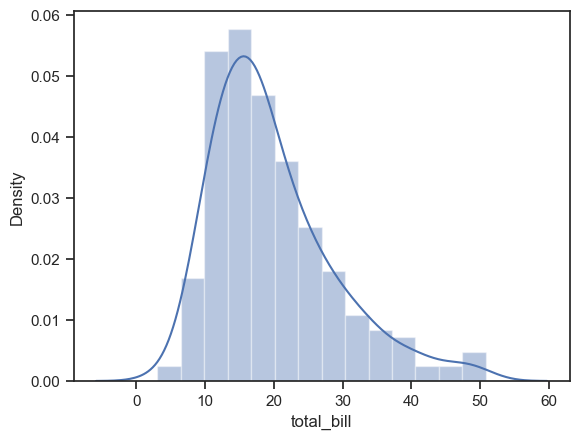

In [20]:
## plotting the skewness of the column 'total_bill'

sns.distplot(server_df['total_bill'])

In [22]:
## 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.
## getting the correlation between 'tip' and 'total_bill'

server_df[['tip','total_bill']].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


<Axes: xlabel='total_bill', ylabel='tip'>

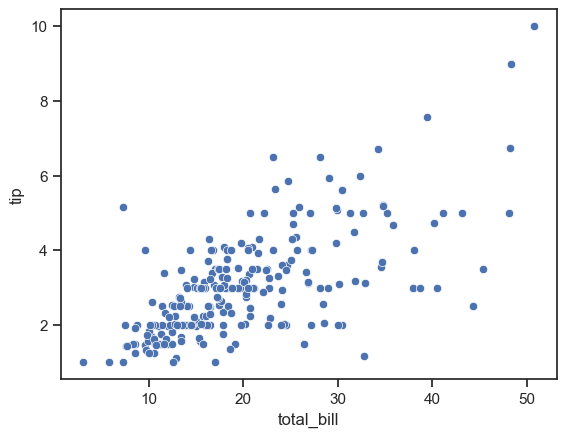

In [23]:
# plotting the distribution of tip and total_bill 

sns.scatterplot(x='total_bill', y='tip', data=server_df)

In [25]:
## 9. What is the percentage of males and females in the dataset? and display it in the plot
## getting percentage of males and females in the dataset

server_df['sex'].value_counts(normalize=True)*100

sex
Male      64.344262
Female    35.655738
Name: proportion, dtype: float64

In [26]:
## 10. Compute the gender-wise count based on smoking habits and display it in the plot
## getting gender-wise count based on smoking habits

pd.crosstab(server_df['sex'], server_df['smoker'])

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


In [28]:
## 11. Compute the average tip amount given for different days and display it in the plot.
## getting average of tip amount for each day

server_df.groupby('day')['tip'].mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

In [29]:
## 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.
## getting avaerage bill amount as per the size of customer group

server_df.groupby('size')['total_bill'].mean()

size
1     7.242500
2    16.448013
3    23.277632
4    28.613514
5    30.068000
6    34.830000
Name: total_bill, dtype: float64

<Axes: xlabel='total_bill', ylabel='sex'>

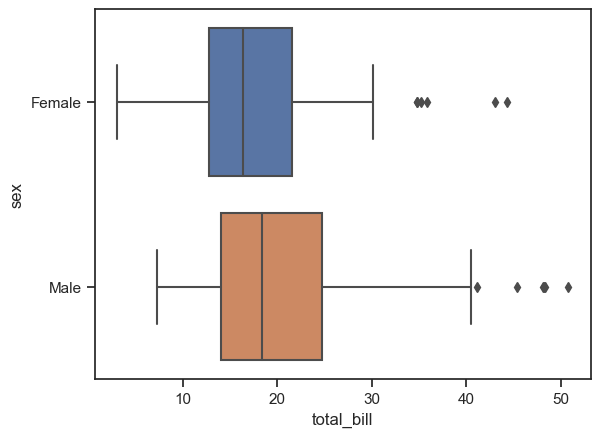

In [30]:
## 13. Plot a horizontal boxplot to compare the bill amount based on gender
## plotting the horizontal box-plot for relation between bill and gender

sns.boxplot(x='total_bill', y='sex', data=server_df, orient='h')

In [31]:
## 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday
## getting maximum bill amount for lunch and dinner on Saturday/Sunday


## filtering dataset for Saturday/Sunday only
array = ['Sat', 'Sun']
filter_df = server_df.loc[server_df['day'].isin(array)]

## fetching max of bill amount from filtered data
filter_df.groupby(['day','time'])['total_bill'].max() 

day  time  
Sat  Dinner    50.81
Sun  Dinner    48.17
Name: total_bill, dtype: float64

In [32]:
## 15. Compute the percentage of missing values in the dataset.
## getting percentage of missing values

(server_df.isnull().sum()/len(server_df))*100

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

In [33]:
## 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.
## getting duplicate records in the dataset

server_df[server_df.duplicated()]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


<Axes: >

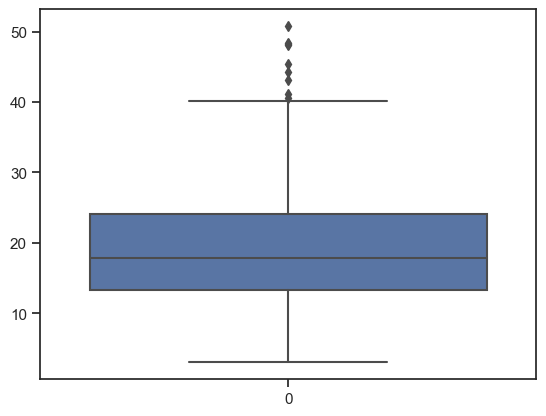

In [34]:
## 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment
## plotting the box-plot of total-bill -- with outliers : before treatement

sns.boxplot(server_df['total_bill'])

<Axes: >

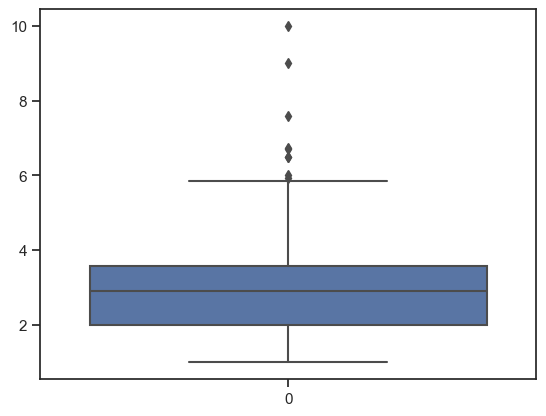

In [35]:
## 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.
## plotting the box-plot for the column 'tip' : checking the outlier

sns.boxplot(server_df['tip'])

In [39]:
## 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.
## fetching categorical data from the dataset

server_df_cat = server_df.select_dtypes('object')
server_df_cat

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner
...,...,...,...,...
239,Male,No,Sat,Dinner
240,Female,Yes,Sat,Dinner
241,Male,Yes,Sat,Dinner
242,Male,No,Sat,Dinner


In [41]:
## 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.
## importing library
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

In [42]:
## checking the min & max values of 'total_bill' column in current dataset

server_df['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

In [43]:
## checking the min & max values of 'total_bill' column : after transformation

server_df['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

In [44]:
##21. Load the dataset again by giving the name of the dataframe as "tips_df"
 ## i) Encode the categorical variables.
## ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable
## loading dataset into tips_df

tips_df = pd.read_csv('tips.csv')

## setting max columns to none
pd.set_option('display.max_columns', None)


tips_df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [45]:
## i) encoding categorical variables in the tips_df

tips_df = pd.get_dummies(tips_df, drop_first=True)

tips_df.head(5)

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False


In [46]:
## ii) storing traget column 'tip' in variable Y and others in variable X

## storing traget column 'tip' in variable Y
Y = tips_df['tip']
Y.head(5)

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [49]:
## storing other columns in variable X
X = tips_df.drop('tip', axis=1)
X.head(5)

,total_bill,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,2,False,False,False,True,False,False
1,10.34,3,True,False,False,True,False,False
2,21.01,3,True,False,False,True,False,False
3,23.68,2,True,False,False,True,False,False
4,24.59,4,False,False,False,True,False,False


In [51]:
## 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach
## loading libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,StackingClassifier,GradientBoostingClassifier


## splitting the data

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(170, 8) (74, 8)
(170,) (74,)


In [52]:
## scaling the data using StandardScaler
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train.iloc[:,:])
X_test_sc = ss.fit_transform(X_test.iloc[:,:])

In [53]:
## standardizing columns 'total_bill' and 'size' using minmax approach

tips_df['total_bill'] = minmax.fit_transform(tips_df[['total_bill']])
tips_df['size'] = minmax.fit_transform(tips_df[['size']])

In [54]:
tips_df['total_bill'].describe

<bound method NDFrame.describe of 0      0.291579
1      0.152283
2      0.375786
3      0.431713
4      0.450775
         ...   
239    0.543779
240    0.505027
241    0.410557
242    0.308965
243    0.329074
Name: total_bill, Length: 244, dtype: float64>

In [55]:
tips_df['size'].describe

<bound method NDFrame.describe of 0      0.2
1      0.4
2      0.4
3      0.2
4      0.6
      ... 
239    0.4
240    0.2
241    0.2
242    0.2
243    0.2
Name: size, Length: 244, dtype: float64>

In [56]:
## 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


## training linear regression model with training data

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [57]:

## training linear regression model with scaled training data

model_sc = LinearRegression()
model_sc.fit(X_train_sc, Y_train)

LinearRegression()

In [58]:
## computing predictions on the test data

predictions = model.predict(X_test)
predictions_sc = model_sc.predict(X_test_sc)

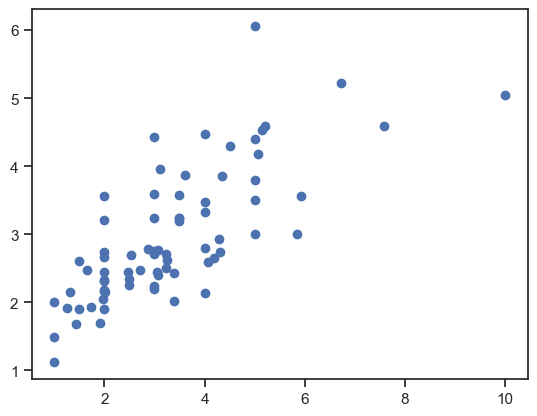

In [59]:
## plotting a graph to view the distribution between test-data and predictions

plt.scatter(Y_test, predictions)

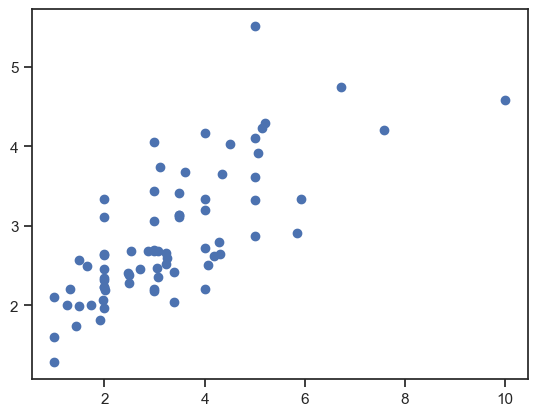

In [60]:
## plotting a graph to view the distribution between test-data and predictions of Standardized/Scaled test data

plt.scatter(Y_test, predictions_sc)

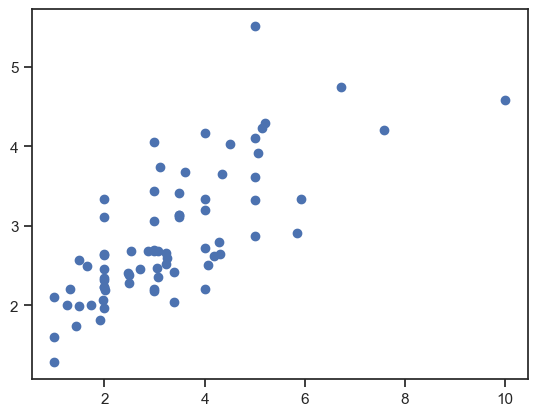

In [61]:
## plotting a graph to view the distribution between test-data and predictions of Standardized/Scaled test data

plt.scatter(Y_test, predictions_sc)

In [62]:
## computing r_squared value for scaled and unscaled test data


## r_squared value for unscaled test data
r2 = r2_score(Y_test, predictions)
print('The r_squared value on unscaled test-data is: ' + str(r2))
print()

## r_squared value for scaled test data
r2 = r2_score(Y_test, predictions_sc)
print('The r_squared value on scaled test-data is: ' + str(r2))
print()

The r_squared value on unscaled test-data is: 0.49210704809693095

The r_squared value on scaled test-data is: 0.41989000385241904

